# KNN: K-Nearest Neighbors (K-vizinhos mais próximos)

### Objetivos dessa aula:
* apresentar o conceito do algoritmo de KNN
* explicar a diferença do KNN aplicado em problemas de regressão e classificação
* apresentar um caso prático de KNN
* prós e contras dessa abordagem



## Intuição
Se tivessemos que definir que animal esse ponto de interrogação representa, vocês diriam que é um cachorro ou um cavalo?

<img src="images/knn_intuição.png"  style="width: 700px" />

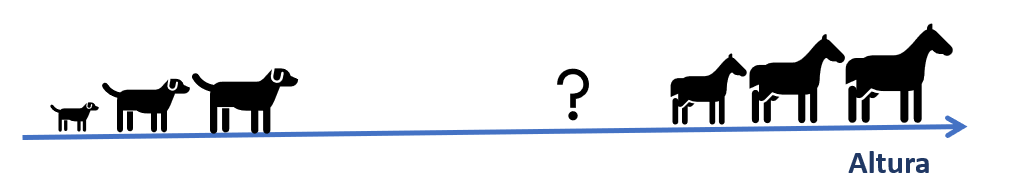

Suponha que as alturas em metros sejam, da esquerda para direita, 0.1, 0.4, 0.8, 1.4, 1.7, 2.0. Como você escreveria um programa para detectar qual é o animal do ponto de interrogação dado que ele tem 1.2 de altura?

In [1]:
# Código


E se além da altura também tivéssemos o peso dele em kg, como você escreveria um código para detectar qual é o bicho que queremos descobrir?
Desafio opcional: Escreva um código e considere os pesos, da esqueda para a direita: 5, 30, 50, 100, 180, 220 e o peso do animal desconhecido como 87kg

In [7]:
# Código
import numpy as np
cachorro_m= [0.1, 0.4, 0.80]
cavalo_m = [1.4, 1.7, 2.0]

cachorro_kg= [5, 30, 50]
cavalo_kg = [100, 180, 220]

int_kg = 87
int_m = 1.2

dist_cachorro = []
for i in range(len(cachorro_kg)):
    x=(cachorro_m[i]-int_m)**2
    y=(cachorro_kg[i]-int_kg)**2
    dist_cachorro.append(np.sqrt(x+y))

print(dist_cachorro)

dist_cavalo = []
for i in range(len(cachorro_kg)):
    x=(cavalo_m[i]-int_m)**2
    y=(cavalo_kg[i]-int_kg)**2
    dist_cavalo.append(np.sqrt(x+y))

print(dist_cavalo)

[82.00737771688594, 57.00561375864661, 37.00216209899092]
[13.001538370516005, 93.00134407630892, 133.00240599327518]


O KNN segue essa mesma lógica de encontrar quem são os k vizinhos mais próximos

### Funcionamento do KNN
<img src="images/algoritmo_passo_a_passo.png"  style="width: 700px" />


Fonte: https://cambridgecoding.wordpress.com/
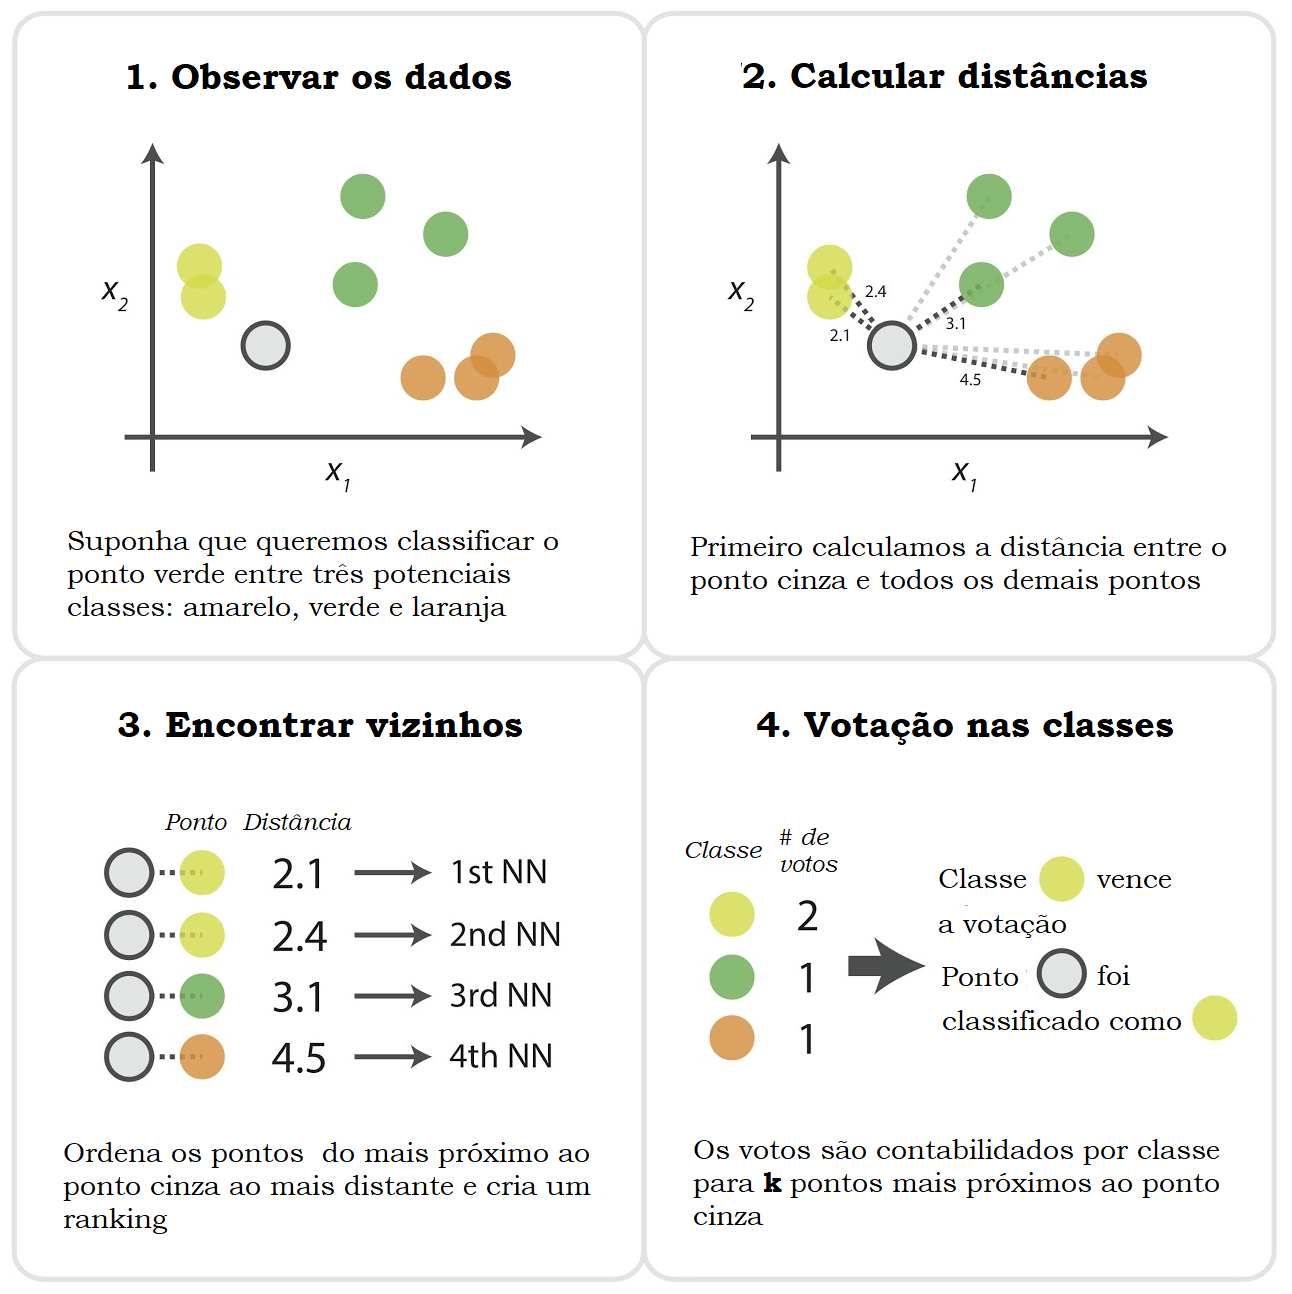

### Perguntas: 
1 - E se eu tivesse uma amostra nova, como faço para definir a que classe ela pertence? <br>
2 - Como ficaria a votação em um problema de regressão?
 <br>
 <br>
 <br>
  <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
  <br>
 <br>
 <br>
  <br>
 <br>
 <br>

#### Resposta:
Em um problema de classificação selecionamos a classe mais frequente (moda) entre os k vizinhos mais próximos enquanto na regressão calculamos a média dos k valores target mais próximos. <br>

### Regressão em 1D

<img src="images\knn_regressão0.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão1.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão3.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão4.png" alt="Drawing" style="width: 500px;"/>
<img src="images\knn_regressão5.png" alt="Drawing" style="width: 500px;"/>
<img src="images/knn_regressão.png"  alt="Drawing"  style="width: 500px">


### 2D

<img src="images/knn_regressão_x_classificação.png"  style="width: 700px" />

<br>

Fonte: https://realpython.com/knn-python/


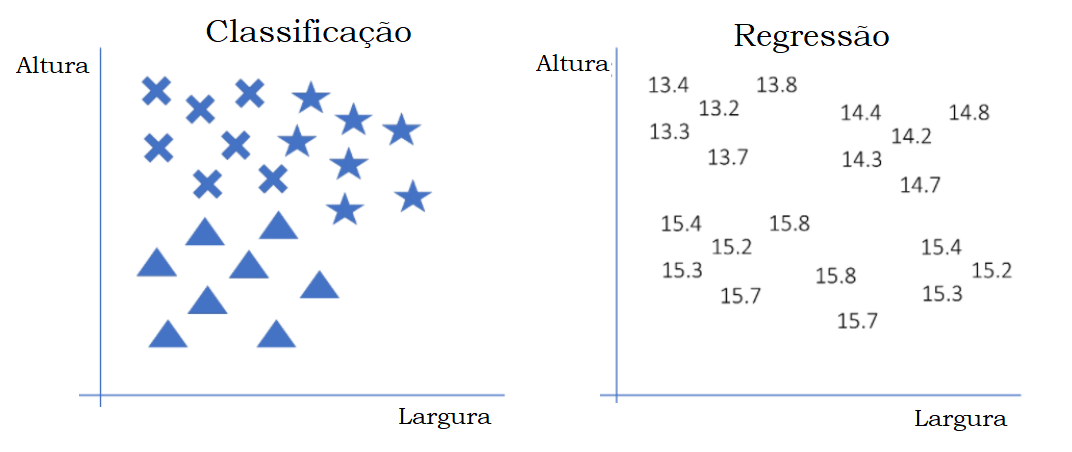

### Retomando <br>

KNN é um modelo baseado na **distância** entre os elementos pois ele parte da premissa que **observações similares** estarão **próximas** umas das outras enquanto **observações diferentes** estarão mais **distante**. 
<br>
<br>

Podemos calcular a distância entre dois pontos p e q usando a **distância Euclidiana**, definida como

$$ \begin{align} d(p,q)=\sqrt{\sum \limits _{i=1} ^n (p_i−q_i)^2} \end{align} $$
    
onde $p_i$ e $q_i$ representam o valor do atributo i para os pontos p e q e a soma é feita em todas as n dimensões (features).
<br>
<br>

Os passos realizados pelo algoritmo são: <br>
1 - Calcular a distância entre o ponto de interesse e os demais pontos <br>
2 - Rankear os pontos pela menor distância <br>
3 - Encontrar os k pontos/vizinhos mais próximos <br>
4 - Votar o label para o ponto a ser previsto ou realizar uma média entre os pontos <br>
<br>
Se em um problema de classificação tivermos n classes **evitar usar k múltiplo de n** para não termos empate de classes e **nem k pares**. Exemplo: em um problema como o mostrado acima com 3 classes, se usarmos k=3 podemos ter uma situação em que os três pontos mais próximos perteçam à classes diferentes
<br><br>
E como vimos podemos utilizá-lo tanto em um problema de **classificação** quanto **regressão**.



## Caso prático
Vamos aplicar o KNN em um caso prático e discutir outros pontos essenciais sobre o modelo.
<br>

#### Problema:
Queremos predizer se um usuário que clicou no nosso anúncio em uma rede social irá realizar uma compra. Nesse caso, temos um problema de classificação binário.
<br> <br>
Fonte dos dados: https://www.kaggle.com/rakeshrau/social-network-ads

#### Da aula anterior temos o passo a passo que queremos seguir:
- 0) Fazer todo o processo de limpeza e avaliação da base, EDA, etc., etc.


- 1) Importar a **classe do algoritmo que se deseja treinar**
        - Usaremos quase sempre a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
    
  
- 2) Instanciar a classe do algoritmo, **escolhendo os hiperparâmetros desejados**
        - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
        - Veremos mais pra frente como escolher os parâmetros adequadamente;
    
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
        - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
        - Para fazer a separação, usamos o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

In [4]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar o dataset
dataset = pd.read_csv('data/Social_Network_Ads.csv').drop('Gender', axis=1)
dataset.head()

User ID  Age  EstimatedSalary  Purchased
0  15624510   19            19000          0
1  15810944   35            20000          0
2  15668575   26            43000          0
3  15603246   27            57000          0
4  15804002   19            76000          0

##### Metadados
*User ID:* identificador único do usuário (variável inteira positiva) <br>
*Gender:* gênero do usuário (variável binária string) <br>
*Age:* idade do usuário (variável inteira positiva) <br>
*Estimated Salary:* salário estimado da pessoa (variável inteira positiva) <br>
*Purchased:* indica se o usuário realizou ou não uma compra (booleana numérica)

### Data Analysis

In [5]:
# Encontre as estatísticas básicas do dataset
dataset.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

Vamos fazer um rápido EDA utilizando a seaborn

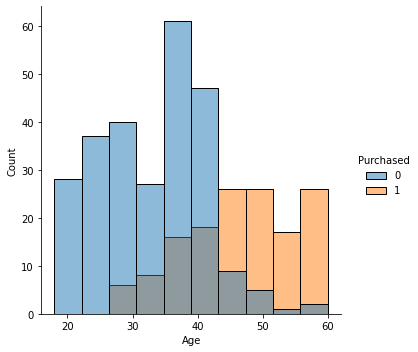

In [6]:
# Faça um displot da coluna Age utilizando Purchase nas cores
sns.displot(data=dataset, x='Age', hue='Purchased');

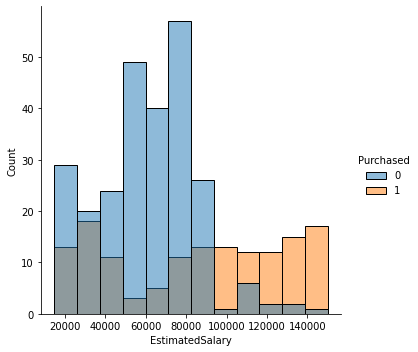

In [7]:
# Faça um displot da coluna EstimatedSalary utilizando Purchase nas cores
sns.displot(data=dataset, x='EstimatedSalary', hue='Purchased');

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

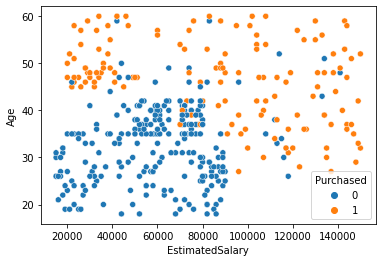

In [9]:
sns.scatterplot(data=dataset, x='EstimatedSalary', y='Age', hue='Purchased')

In [10]:
# Calcule a quantidade de amostra em cada classe
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [12]:
# Calcule a porcentagem de amostra em cada classe
dataset.Purchased.value_counts(normalize=True)*100

0    64.25
1    35.75
Name: Purchased, dtype: float64

O dataset está desbalanceado?

In [13]:
# Checar se temos nulos
dataset.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<br>

### Processamento dos Dados

In [14]:
# Definir variável target
target = 'Purchased'

# Separar as variáveis independentes do target
X = dataset.drop([target, 'User ID'], axis=1)       # Variáveis independentes (features)
y = dataset[[target]]                               # Variável dependente / target  

X.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [15]:
y.head()

Purchased
0          0
1          0
2          0
3          0
4          0

#### Separação dos dados em um dataset de treino e um de teste

Quando treinamos um modelo é necessário testá-lo em um conjunto de teste. Isso ajuda a validar o quanto seu modelo consegue generalizar e a ajustar melhor o modelo. Para isso vamos utilizar o método [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do sklearn

<img src="images/splitting-data-set.png"  style="width: 400px" />

In [ ]:
# !pip install scikit-learn

In [17]:
# Utilizar o train_test_split do sklearn.model_selection para
# separar um dataset para treino e outro para teste (80/20) com random_state = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)

Tamanho do treino:  (320, 2)
Tamanho do teste:  (80, 2)


#### Pré-processamento:
Como nossos dados tem escalas muito diferentes (Estimated Salary é da ordem de 1000x maior que o Age) e o KNN depende da distância, nós temos que normalizar nossos dados. <br> <br>
LEMBRETE:  a normalização NUNCA deve acontecer ANTES da separação em treino e teste. Essa é uma das formas mais comuns de vazamento de informação (leakage)

##### Normalização

Importante normalizar para que os dados fiquem sempre na mesma escala
* Evita que certos algoritmos entendam que determinados atributos tenham mais pesos e sejam considerados mais importantes que outros
* Facilita cálculos internos de determinados algoritmos como redes neurais

<img src="images/normalization.png"  style="width: 400px" />

* Normalização/Standarization

1. Min-Max: $$y = (x – min) / (max – min)$$
2. Standarization: escalar valores de forma que a média seja igual a zero e o desvio padrão igual a 1, seguindo uma distribuição normal
$$y = (x – mean) / standard\_deviation$$
3. RobustScaler: remove outliers seguindo os quartis dos dados e aplica os métodos 1 ou 2 posteriormente <br> <br>

OBS 1: $x - mean$ é chamado também de centralização <br>
OBS 2: $x/standard\_deviation$ também é chamado de escala <br>
OBS 3: esses métodos devem ser aplicados no dataset de *treinamento* e replicados no teste e validação. Chama-se aplicar a normalização de "fit" e replicar seus resultados em outras bases de "transform". <br>

É considerado **ERRADO** aplicar das formas abaixo: <br>
- Normalizar antes de particionar o dataset, aplicando-se a normalização em todos os dados disponíveis <br>
- Normalizar treino e teste ao invés de aplicar no teste a normalização realizada no treino <br>

In [19]:
# Utilizar o MinMaxScaler do sklearn.preprocessing para
# normalização dos dados com Min Max
 
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5]

array([[0.95238095, 0.95555556],
       [0.97619048, 0.5037037 ],
       [0.14285714, 0.2962963 ],
       [0.19047619, 0.14814815],
       [0.95238095, 0.17037037]])

### Treino do modelo e previsão
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [36]:
# Importar o modelo KNeighborsClassifier da classe sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3 # quantidade de vizinhos 
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2) # use p=2 para distância euclidiana

In [37]:
# Realiza o treino do modelo passando o dataset de treino de features e labels
clf.fit(X_train, y_train)

/home/patricia/Documentos/escritorio_dados/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [38]:
# Utiliza o modelo treinado para predizer no dataset de teste
y_pred = clf.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

### Como saber se meu modelo ficou bom? 

In [43]:
# Criar um dataframe com os valores preditos e verdadeiros para calcular os acertos
comparacao = pd.DataFrame(X_test, columns=['Age', 'EstimatedSalary']).copy()
comparacao['valor_verdadeiro'] = y_test.reset_index(drop=True)
comparacao['valor_predito'] = y_pred
comparacao['acertou'] = 1 - np.abs(comparacao['valor_verdadeiro']-comparacao['valor_predito'])

In [44]:
comparacao.head()

Age  EstimatedSalary  valor_verdadeiro  valor_predito  acertou
0  0.285714         0.533333                 0              0        1
1  0.476190         0.259259                 0              0        1
2  0.404762         0.444444                 0              0        1
3  0.285714         0.474074                 0              0        1
4  0.404762         0.259259                 0              0        1

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

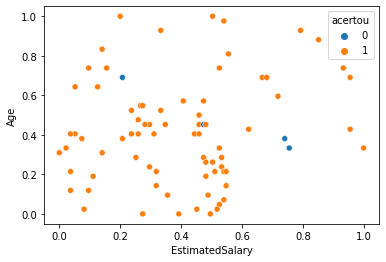

In [46]:
# Scatterplot para verificar os erros e acertos
sns.scatterplot(data=comparacao, y='Age', x='EstimatedSalary', hue='acertou')

In [53]:
# salvando resultados do modelo
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

#### Avaliação do modelo utilizando matriz de confusão

In [48]:
type(y_pred)

numpy.ndarray

Acurácia do modelo: 95.0%


/home/patricia/Documentos/escritorio_dados/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


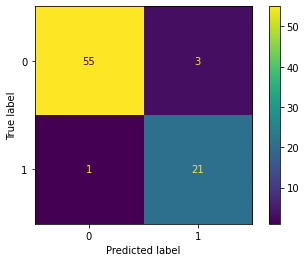

In [49]:
# Importar accuracy_score e plot_confusion_matrix do sklearn.metrics 
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {ac:.1%}")

plot_confusion_matrix(clf, X_test, y_test);

## Voilá! Está pronto nosso primeiro KNN. Ele servirá como baseline de comparação para as melhorias.

## Medidas de distância

<img src="images/9_distance_metrics.png" width="600px" text="https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa">

### Distância euclidiana
$$ D(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$$
__Vantagens:__
- Muito fácil de entender e aplicar
- É a menor distância entre dois pontos em um plano cartesiano
- Tem resultados muito bons em dados com baixa dimensionalidade e quando a magnitude do vetor é importante

__Desvantagens:__
- Não é invariante à escala (as distâncias computadas podem estar skewed dependendo das unidades das features - solução: normalizar os dados)
- Quanto maior a dimensionalidade dos seus dados, menos útil é essa distância (devido à Maldição da Dimensionalidade)
- Não é recomendada quando o dataset possui atributos discretos e/ou binários

### Distância de Manhattan 
$$ D(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$$
__Vantagens:__
- Utilizada quando podemos apenas se mover em ângulos de 90º como em um tabuleiro de xadrez ou uma cidade. Nesse caso, não há movimentação na diagonal
- Não sofre com a maldição da dimensionalidade
- Quando o dataset possui atributos discretos e/ou binários

__Desvantagens:__
- É menos intuitiva, principalmente em grandes dimensões
- Fornece distâncias maiores que a Euclidiana (não necessariamente ruim)

### Distância de Minkowski
$$ D(x,y) = \begin{pmatrix}\sum_{i=1}^{n}{|x_i - y_i|^p}\end{pmatrix}^{1/p}$$

- p=1 — Distância de Manhattan
- p=2 — Distância euclidiana
- p=∞ — Distância de Chebyshev

## Maldição da Dimensionalidade
<img src="images/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two.png" width="600px" text="www.researchgate.net/figure/The-effect-of-the-curse-of-dimensionality-when-projected-in-1-one-dimension-2-two_fig3_342638066">

## Melhorias:
* Definir o melhor valor para K
* Definir qual melhor métrica de distância
* Considerar pesos maiores para pontos mais próximos
* Considerar pesos maiores para features mais importantes
* Balancear classes
* Escolher uma métrica melhor para avaliar datasets desbalanceados

## Principais pontos do KNN:
* É um algoritmo supervisionado, ou seja, precisa de uma variável de target <br>
* É um algoritmo preguiçoso (lazy) pois realiza todos os cálculos na fase de teste. <br>

#### Prós 

1 – Aplicável tanto para problemas de classificação (target são classes) quanto de regressão (target contínuo) <br>
2 – É um dos mais simples algoritmos a se implementar.  <br>
3 – Modelos mais complexos, como uma rede neural, necessitam de uma quantidade maior de dados para serem treinados que o KNN. <br>
4 – Poucos paramêtros para tunning (Valor de K, Medida de Distância e peso nas distâncias) <br>
5 – O tempo de treinamento é utilizado para "memorizar" os dados. Ele armazena os dados na RAM. Por isso ele possui um dos fit mais rápidos. <br>
6 – O KNN pode ser utilizado em dados não lineares bem como para problemas de regressão. <br>
7 – Facilmente interpretável <br>
8 – É um Algoritmo de Aprendizagem Não Linear, ou seja, não utiliza linhas e hiperplanos para separar os dados <br>
9 – Pode ser aplicado em casos que temos pouca quantidade de dados <br>


#### Contras

1 – Demora excessiva na fase de teste e alto consumo de memória para realizar esta atividade, uma vez que ele armazena todo dataset em memória. (KDtrees e BallTrees)<br>
2 – KNN não é indicado a dados de grandes dimensões, devido à demora em calcular a distância de todos os pontos de dados entre si. <br>
3 – Como ele depende de medidas de distância é importante se atentar a escala dos valores utilizados. <br>
4 – Classes muito desbalanceadas fazem com que a classe maioritária domine na votação <br>
5 – Dimensões irrelevantes podem causar ruídos nos dados


## Próximas aula:
* Medidas de distância
        * Distância Euclidiana
        * Distância Manhattan
        * Distância de Hamming
* Como escolher o melhor valor de K e a melhor métrica de distância - conjunto de validação
* Como avaliar overfitting e underfitting 
* O que fazer quando temos um dataset muito grande
* Maldição da dimensionalidade

### Bibliografia
- https://www.slideshare.net/jorisschelfaut/knn-154482179 <br>
- https://www.kaggle.com/rakeshrau/social-network-ads <br>
- https://realpython.com/knn-python/ <br>
- https://cambridgecoding.wordpress.com/
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html



### Material de Aprofundamento
- [KD-Tree](https://www.youtube.com/watch?v=Glp7THUpGow) <br>
- [Maldição da dimensionalidade](https://www.youtube.com/watch?v=DyxQUHz4jWg) <br>
- [KNN and High Dimensional Data](https://www.baeldung.com/cs/k-nearest-neighbors)
- [Medidas de distância](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)
- [Why is Euclidean distance not a good metric in high dimensions?](https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
